<a href="https://colab.research.google.com/github/digitalcoya/digitalcoya.github.io/blob/main/fotoapp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


========== MENÚ FOTOAPP ==========
1) Cargar y redimensionar imagen (OBLIGATORIO)
2) Ajustar contraste
3) Aplicar filtro
4) Generar boceto artístico
5) Salir
Seleccione opción: 2
Error: Primero debe cargar la imagen (opción 1).

========== MENÚ FOTOAPP ==========
1) Cargar y redimensionar imagen (OBLIGATORIO)
2) Ajustar contraste
3) Aplicar filtro
4) Generar boceto artístico
5) Salir
Seleccione opción: 1
Ruta de la imagen: blanco negro.jpg
Plataforma: youtube
Imagen cargada: imagen_youtube.jpg

========== MENÚ FOTOAPP ==========
1) Cargar y redimensionar imagen (OBLIGATORIO)
2) Ajustar contraste
3) Aplicar filtro
4) Generar boceto artístico
5) Salir
Seleccione opción: 2


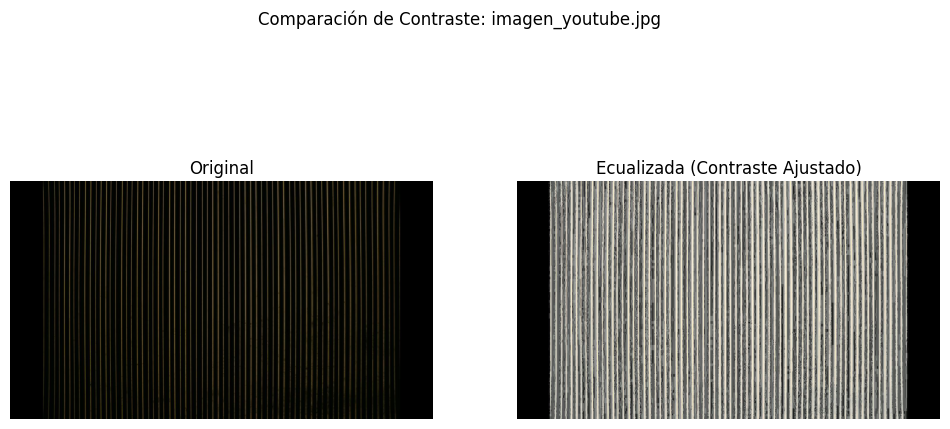

Figura guardada como: imagen_youtube_comparacion.png

========== MENÚ FOTOAPP ==========
1) Cargar y redimensionar imagen (OBLIGATORIO)
2) Ajustar contraste
3) Aplicar filtro
4) Generar boceto artístico
5) Salir
Seleccione opción: 3

Filtros disponibles:
 - ORIGINAL
 - BLUR
 - CONTOUR
 - DETAIL
 - EDGE ENHANCE
 - EDGE ENHANCE MORE
 - EMBOSS
 - FIND EDGES
 - SHARPEN
 - SMOOTH
Ingrese filtro: detail


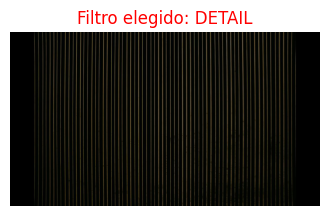

Imagen guardada como: resultado_DETAIL.jpg


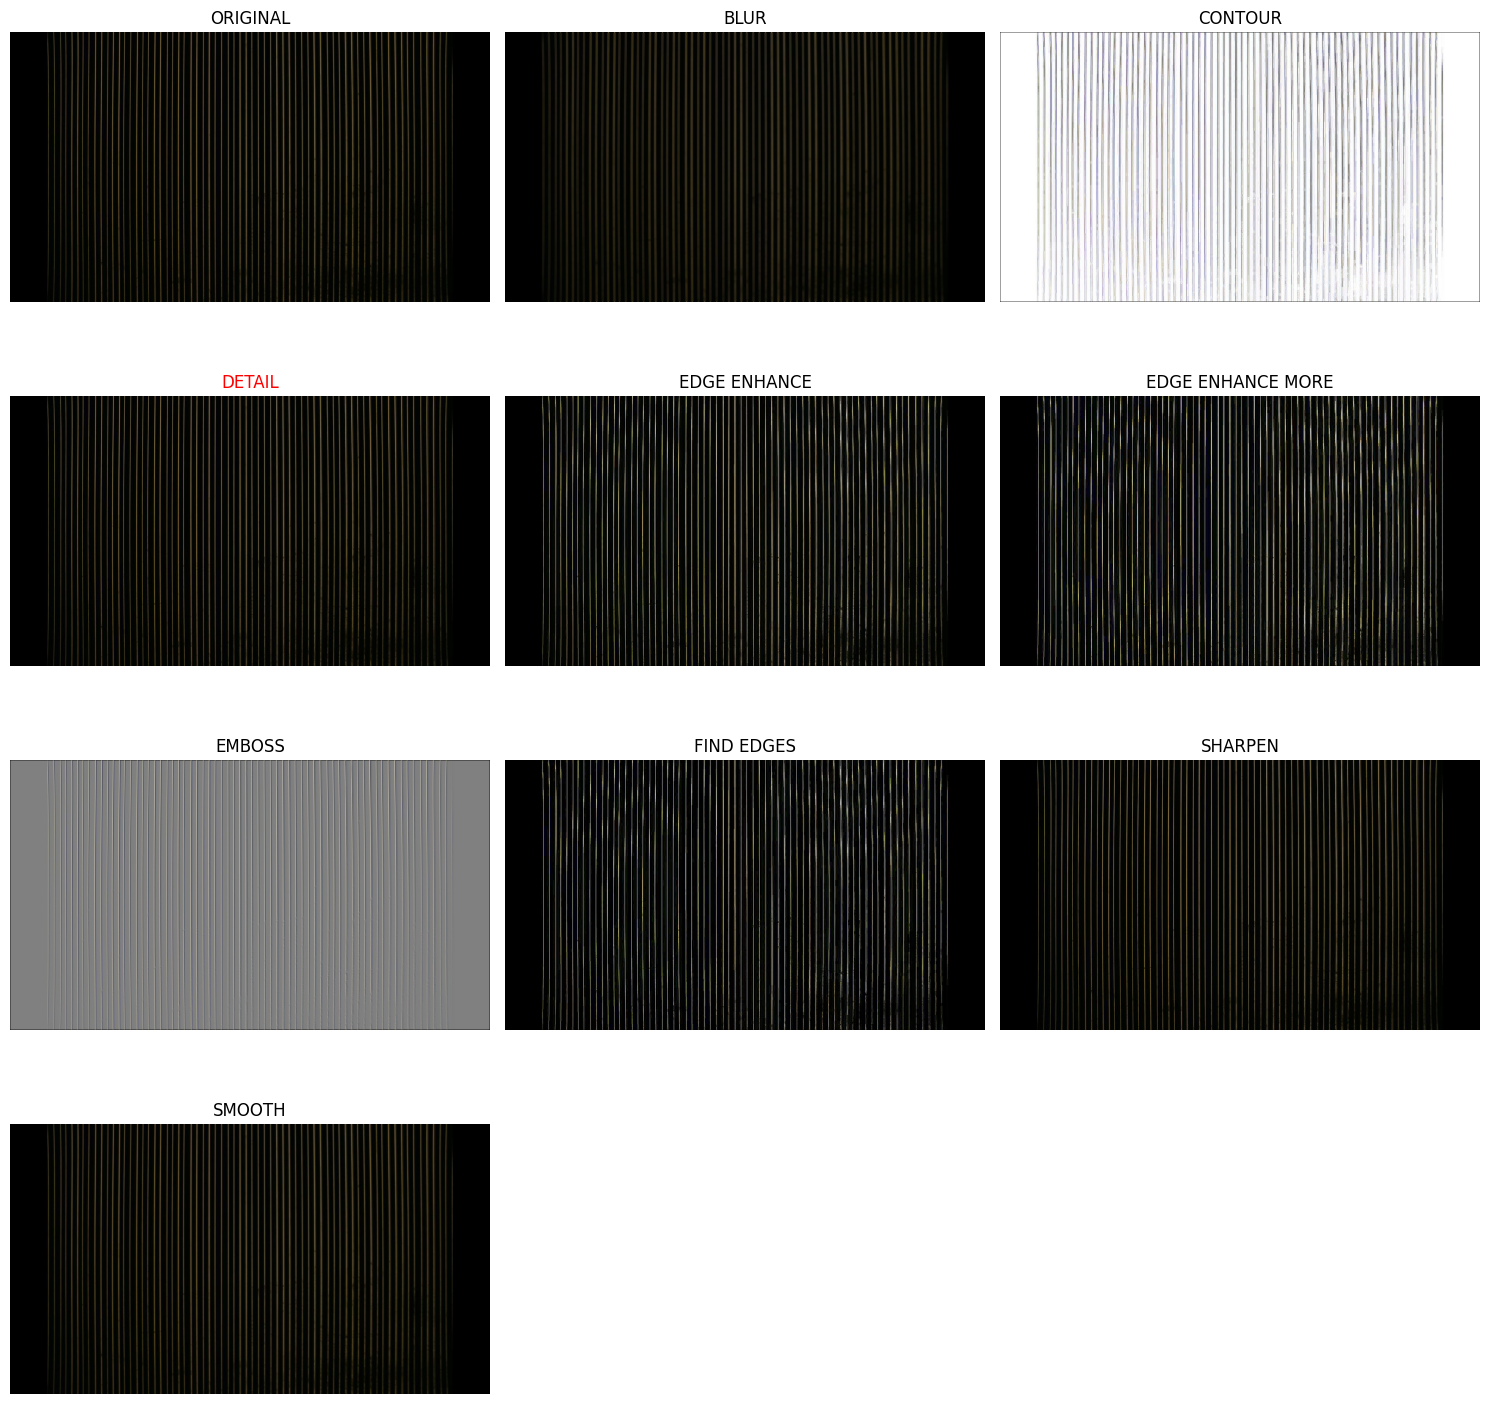

Figura completa guardada como: todos_los_filtros.jpg

========== MENÚ FOTOAPP ==========
1) Cargar y redimensionar imagen (OBLIGATORIO)
2) Ajustar contraste
3) Aplicar filtro
4) Generar boceto artístico
5) Salir


In [ ]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt



# 1) REDIMENSIONAR IMAGEN

def redimensionar_imagen(ruta, plataforma):
    """
    Redimensiona una imagen según la red social elegida
    conservando proporciones y sin distorsionar.
    """

    tamaños = {
        "youtube":  (1280, 720),
        "instagram": (1080, 1080),
        "twitter": (1200, 675),
        "facebook": (1200, 630)
    }

    plataforma = plataforma.lower()

    if plataforma not in tamaños:
        raise ValueError("Plataforma no válida. Use: Youtube, Instagram, Twitter o Facebook")

    new_width, new_height = tamaños[plataforma]

    if not os.path.exists(ruta):
        raise FileNotFoundError(f"No se encontró la imagen en: {ruta}")

    img = Image.open(ruta)

    original_width, original_height = img.size
    ratio_original = original_width / original_height
    ratio_nuevo = new_width / new_height

    if ratio_original > ratio_nuevo:
        new_h = int(new_width / ratio_original)
        resized_img = img.resize((new_width, new_h), Image.Resampling.LANCZOS)
    else:
        new_w = int(new_height * ratio_original)
        resized_img = img.resize((new_w, new_height), Image.Resampling.LANCZOS)

    lienzo = Image.new("RGB", (new_width, new_height), color=(0, 0, 0))
    pos_x = (new_width - resized_img.width) // 2
    pos_y = (new_height - resized_img.height) // 2
    lienzo.paste(resized_img, (pos_x, pos_y))

    nombre = f"imagen_{plataforma}.jpg"
    lienzo.save(nombre)

    return nombre


# 2) AJUSTE DE CONTRASTE – HISTOGRAMA

def equalizar_contraste(ruta_imagen):

    img_original = cv2.imread(ruta_imagen)
    if img_original is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen: {ruta_imagen}")

    img_ycrcb = cv2.cvtColor(img_original, cv2.COLOR_BGR2YCrCb)

    Y, Cr, Cb = cv2.split(img_ycrcb)
    Y_equalized = cv2.equalizeHist(Y)

    img_ecualizada = cv2.merge([Y_equalized, Cr, Cb])
    img_ecualizada = cv2.cvtColor(img_ecualizada, cv2.COLOR_YCrCb2BGR)

    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_ecualizada_rgb = cv2.cvtColor(img_ecualizada, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(img_original_rgb)
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(img_ecualizada_rgb)
    axes[1].set_title('Ecualizada (Contraste Ajustado)')
    axes[1].axis('off')

    plt.suptitle(f"Comparación de Contraste: {ruta_imagen}")
    plt.show()

    nombre_archivo = ruta_imagen.split('.')[0] + '_comparacion.png'
    fig.savefig(nombre_archivo, bbox_inches='tight')

    print(f"Figura guardada como: {nombre_archivo}")
    return img_original, img_ecualizada



# 3) FILTROS


FILTROS = {
    "ORIGINAL": None,
    "BLUR": ImageFilter.BLUR,
    "CONTOUR": ImageFilter.CONTOUR,
    "DETAIL": ImageFilter.DETAIL,
    "EDGE ENHANCE": ImageFilter.EDGE_ENHANCE,
    "EDGE ENHANCE MORE": ImageFilter.EDGE_ENHANCE_MORE,
    "EMBOSS": ImageFilter.EMBOSS,
    "FIND EDGES": ImageFilter.FIND_EDGES,
    "SHARPEN": ImageFilter.SHARPEN,
    "SMOOTH": ImageFilter.SMOOTH
}


def aplicar_filtro(imagen_path, filtro_usuario):

    filtro_usuario = filtro_usuario.upper()
    if filtro_usuario not in FILTROS:
        raise ValueError("Filtro inválido. Use: " + ", ".join(FILTROS.keys()))

    img = Image.open(imagen_path)

    if FILTROS[filtro_usuario] is None:
        img_filtrada = img
    else:
        img_filtrada = img.filter(FILTROS[filtro_usuario])

    plt.figure(figsize=(4, 4))
    plt.imshow(img_filtrada)
    plt.axis("off")
    plt.title(f"Filtro elegido: {filtro_usuario}", color="red")
    plt.show()

    img_filtrada.save(f"resultado_{filtro_usuario}.jpg")
    print(f"Imagen guardada como: resultado_{filtro_usuario}.jpg")

    plt.figure(figsize=(15, 15))

    for i, filtro in enumerate(FILTROS.keys()):
        plt.subplot(4, 3, i+1)

        if FILTROS[filtro] is None:
            nueva = img
        else:
            nueva = img.filter(FILTROS[filtro])

        plt.imshow(nueva)
        plt.axis("off")
        plt.title(filtro, color="red" if filtro == filtro_usuario else "black")

    plt.tight_layout()
    plt.show()
    plt.savefig("todos_los_filtros.jpg")
    print("Figura completa guardada como: todos_los_filtros.jpg")




# 4) FUNCION PARA PINTORES

def generar_boceto(imagen_path, persona=True, modo="lapiz"):

    if not persona:
        raise ValueError("No se detectó una persona en la imagen.")

    img = Image.open(imagen_path)
    gris = ImageOps.grayscale(img)
    suave = gris.filter(ImageFilter.GaussianBlur(radius=2))
    bordes = suave.filter(ImageFilter.FIND_EDGES)

    if modo == "lapiz":
        boceto = ImageOps.invert(bordes)
        boceto = ImageOps.autocontrast(boceto)

    elif modo == "binarizado":
        arr = np.array(bordes)
        umbral = 90
        binar = (arr > umbral) * 255
        boceto = Image.fromarray(binar.astype('uint8'))

    else:
        raise ValueError("Modo inválido. Use 'lapiz' o 'binarizado'.")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(boceto, cmap="gray")
    plt.title(f"Boceto ({modo})")
    plt.axis("off")

    plt.show()

    boceto.save(f"boceto_{modo}.jpg")
    return boceto




# 5) MENÚ


def menu():

    imagen_cargada = None
    persona_detectada = True  # El proyecto indica que otra función hace esto

    while True:
        print("\n========== MENÚ FOTOAPP ==========")
        print("1) Cargar y redimensionar imagen (OBLIGATORIO)")
        print("2) Ajustar contraste")
        print("3) Aplicar filtro")
        print("4) Generar boceto artístico")
        print("5) Salir")

        opcion = input("Seleccione opción: ")

        try:
            if opcion == "1":
                ruta = input("Ruta de la imagen: ")
                plataforma = input("Plataforma: ")
                imagen_cargada = redimensionar_imagen(ruta, plataforma)
                print("Imagen cargada:", imagen_cargada)

            elif opcion in ["2", "3", "4"]:
                if imagen_cargada is None:
                    raise RuntimeError("Primero debe cargar la imagen (opción 1).")

                if opcion == "2":
                    equalizar_contraste(imagen_cargada)

                elif opcion == "3":
                    print("\nFiltros disponibles:")
                    for f in FILTROS.keys():
                        print(" -", f)
                    filtro = input("Ingrese filtro: ")
                    aplicar_filtro(imagen_cargada, filtro)

                elif opcion == "4":
                    modo = input("Modo de boceto (lapiz/binarizado): ")
                    generar_boceto(imagen_cargada, persona_detectada, modo)

            elif opcion == "5":
                print("Saliendo...")
                break

            else:
                print("Opción inválida.")

        except Exception as error:
            print("Error:", error)


# MENU DESDE CONSOLA

if __name__ == "__main__":
    menu()
